In [620]:
'''
This project aims to create a classification model based on historical lending data from kaggle.
(https://www.kaggle.com/wordsforthewise/lending-club). The data is from Lending Club.
I will be doing exploratory data analysis, feature engineering and create an ANN model to predcit if a client will defualt based on data.
I will assess whether a new client is likely to be able to pay back the loan. 'loan_status' ois the target label.
Dataset it quite large with nearly 400,000 entries.

Kieran O'Donnell

'''

"\nThis project aims to create a classification model based on historical lending data from kaggle.\n(https://www.kaggle.com/wordsforthewise/lending-club). The data is from Lending Club.\nI will be doing exploratory data analysis, feature engineering and create an ANN model to predcit if a client will defualt based on data.\nI will assess whether a new client is likely to be able to pay back the loan. 'loan_status' ois the target label.\nDataset it quite large with nearly 400,000 entries.\n\nKieran O'Donnell\n\n"

In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [622]:
#Importing data
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [623]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [624]:
#This functions outputs the description of each column for ease of use
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [625]:
#Usage example
feat_info('mort_acc')

Number of mortgage accounts.


In [626]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [628]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [629]:
#Null values will be addressed

In [630]:
#####Part 1 - Exploratory Data Analysis#####

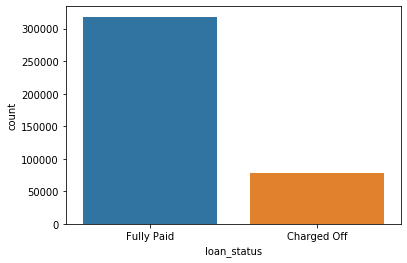

In [631]:
#Bar plot 
sns.countplot(x = 'loan_status', data = df)

In [632]:
#Most people have paid their loans back

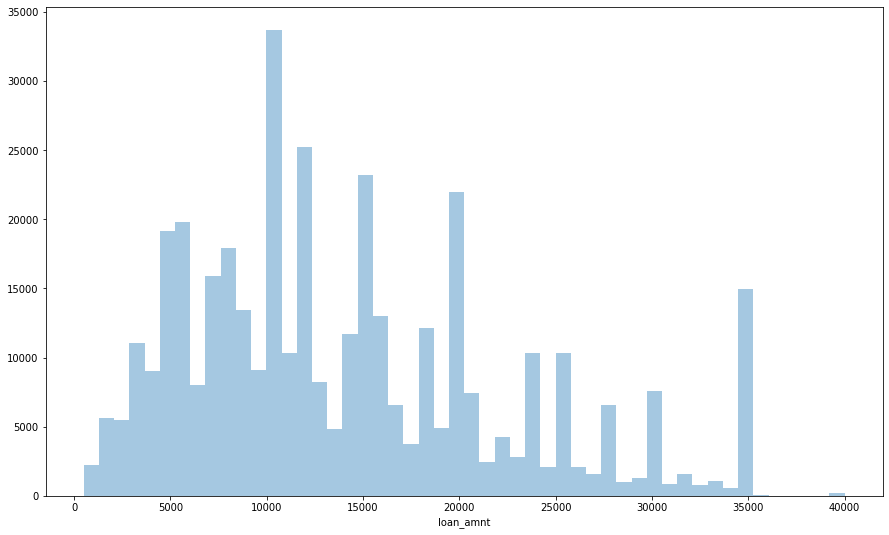

In [633]:
#Histogram of loan amounts
plt.figure(figsize=(15,9))
sns.distplot(df['loan_amnt'], kde=False, bins=50)

In [634]:
#Quite a large variation in loan sizes
#Now will take look at correlation between continuos variables

In [635]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


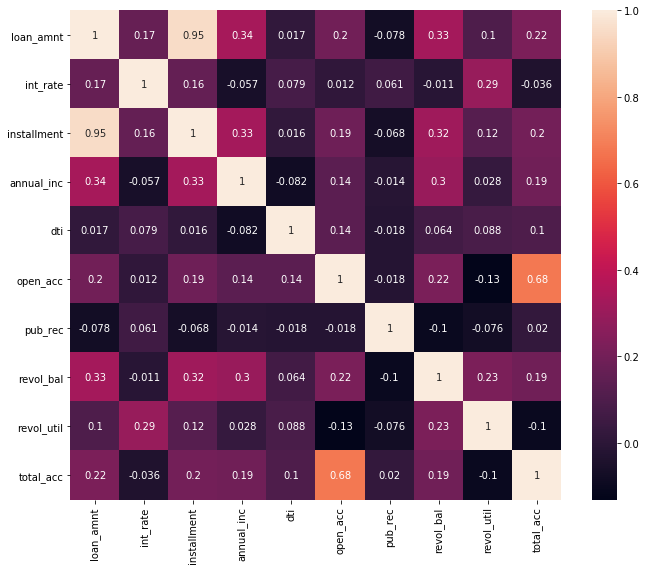

In [636]:
#Now making a heatmap
plt.figure(figsize=(11,9))
df2 = df.drop(['mort_acc','pub_rec_bankruptcies'] ,axis =1)

sns.heatmap(df2.corr(),annot=True)

In [637]:
#Can see very good correlation between 'installment' and 'loan ammount'
#Exploring further

In [638]:
df['installment'].describe()
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [639]:
df['loan_amnt'].describe()
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


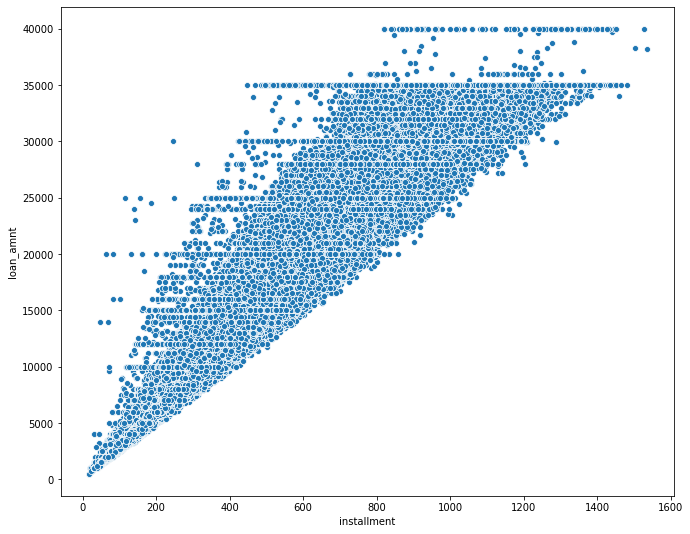

In [640]:
plt.figure(figsize=(11,9))
sns.scatterplot(x='installment',y='loan_amnt', data = df)

In [641]:
#Relationship doesn't appear to make sense. Could be duplicate information here...

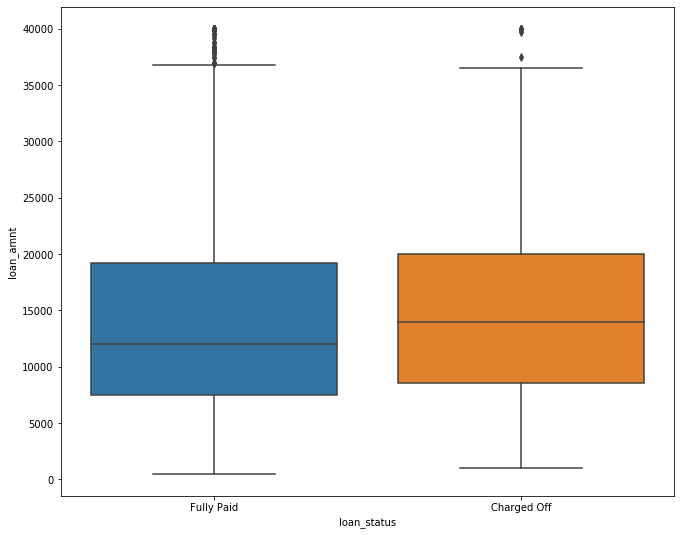

In [642]:
#Boxplot of loan status vs loan amount
plt.figure(figsize=(11,9))
sns.boxplot(x='loan_status', y = 'loan_amnt', data = df)

In [643]:
#Getting stats on loan amount grouped by loan status
df['loan_amnt'].groupby(df['loan_status']).describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [644]:
#Exploring grades and subgrades classes

In [645]:
#How many unique grades?
df['grade'].value_counts()

B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

In [646]:
#How many unique subgrades?
df['sub_grade'].value_counts()

B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: sub_grade, dtype: int64

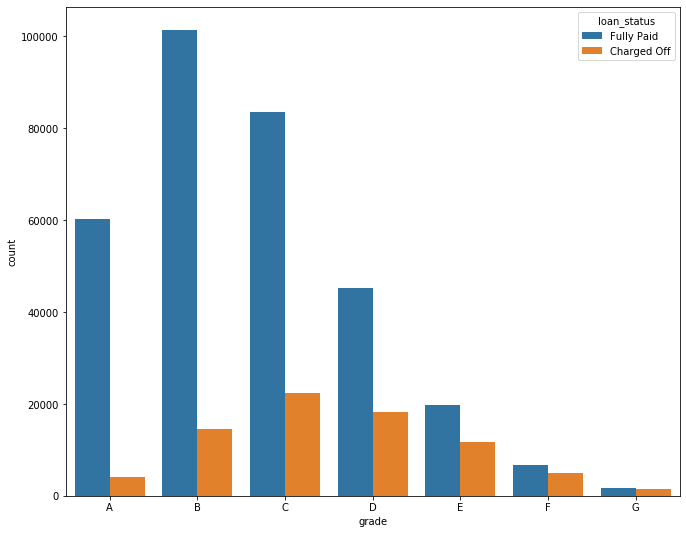

In [647]:
#Performing a countplot per grade, with loan_status
plt.figure(figsize=(11,9))
sns.countplot(x=df['grade'].sort_values(), data = df, hue ='loan_status')

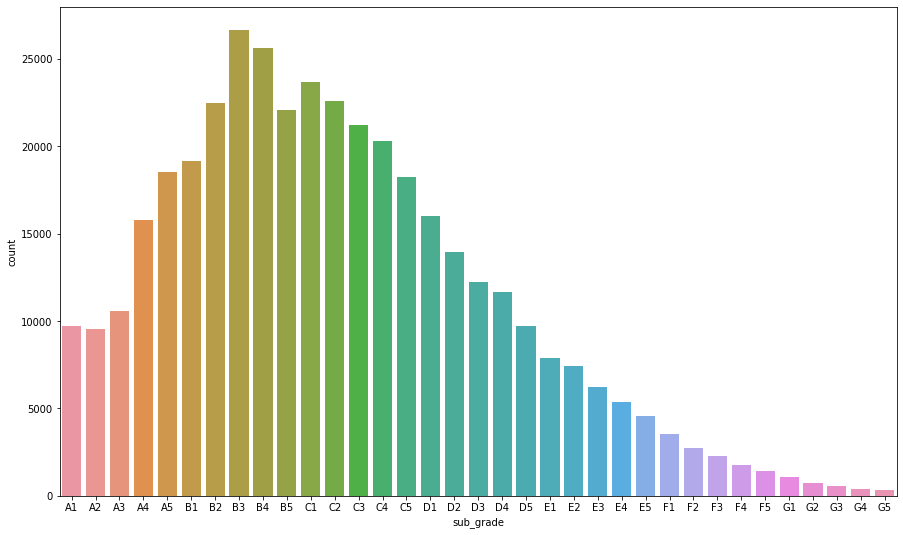

In [648]:
#Performing a countplot per subgrade
plt.figure(figsize=(15,9))
sns.countplot(x=df['sub_grade'].sort_values(), data = df)

In [649]:
#Above shows that there are very few 'awful' grades compared to average (B-C)

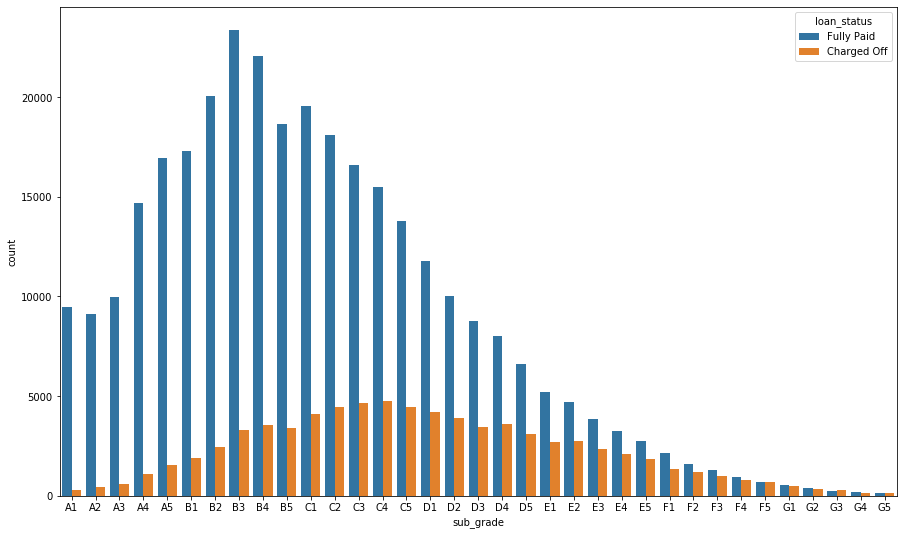

In [650]:
#Performing a countplot per subgrade with loan_status
plt.figure(figsize=(15,9))
sns.countplot(x=df['sub_grade'].sort_values(), data = df, hue ='loan_status')

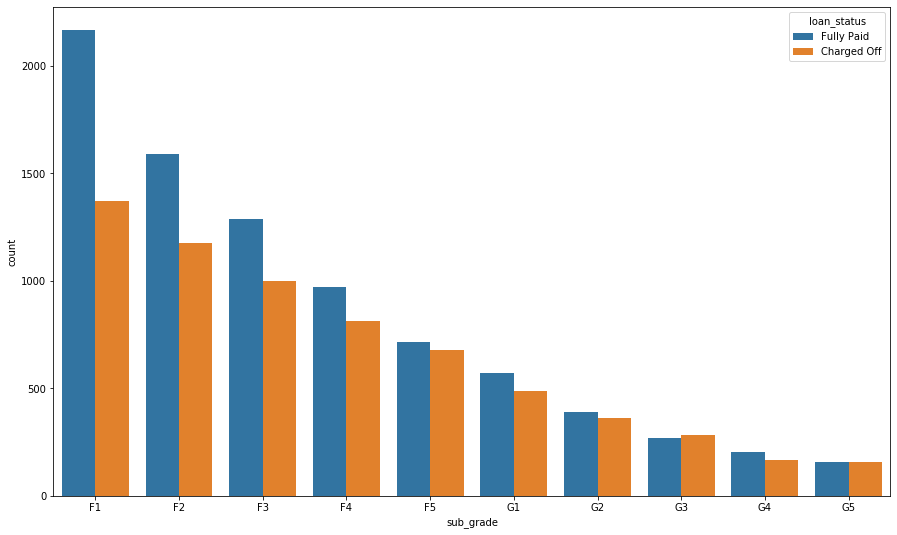

In [651]:

#Can be seen that the distribution is much more regualr for charge-offs
#Doing a count plot for worst subgrades
plt.figure(figsize=(15,9))
f_g_grades = df[(df['grade']=='G') | (df['grade']=='F')]
sns.countplot(x=f_g_grades['sub_grade'].sort_values(), data = df, hue ='loan_status')

In [652]:
#Making a new column called 'loan_repaid' = 0 ('charged off') or 1 ('fully paid')

In [653]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [654]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [655]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


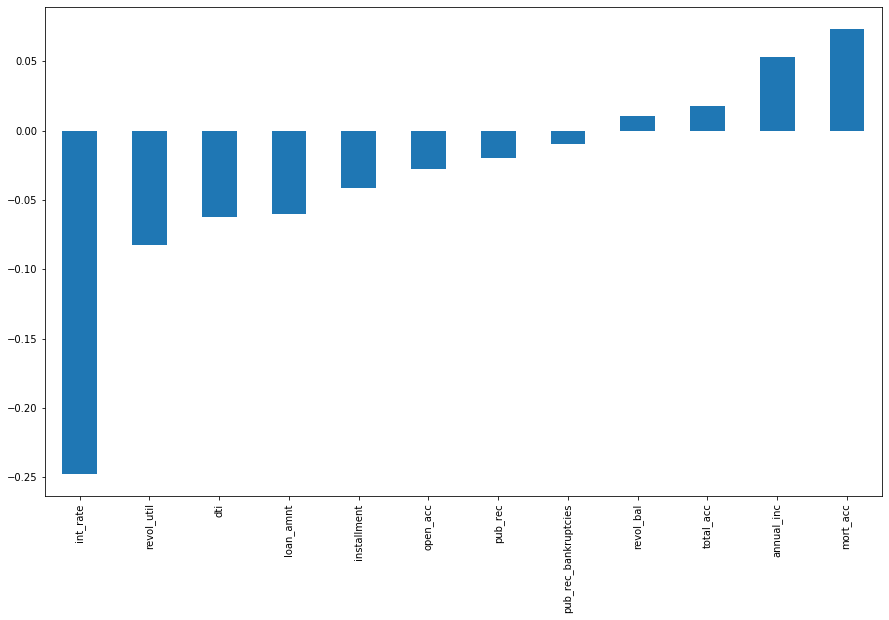

In [656]:
# bar plot showing the correlation of the numeric features to the new loan_repaid column
plt.figure(figsize=(15,9))
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [657]:
#####Part 2 - Data Preprocessing#####

In [658]:
#Dealing with missing values

In [659]:
#Checking for NaN/Null
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [660]:
nan = df.isnull().sum()

In [661]:
#Seeing percent of NaNs per DF length
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [662]:
# invetsigating emp_title emp_length 

In [663]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [664]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [665]:
#So these have to do with borrow job titles

In [666]:
#There are MANY 
#df['emp_title'].nunique()

In [667]:
#Will remove job titles
df = df.drop('emp_title', axis =1,)

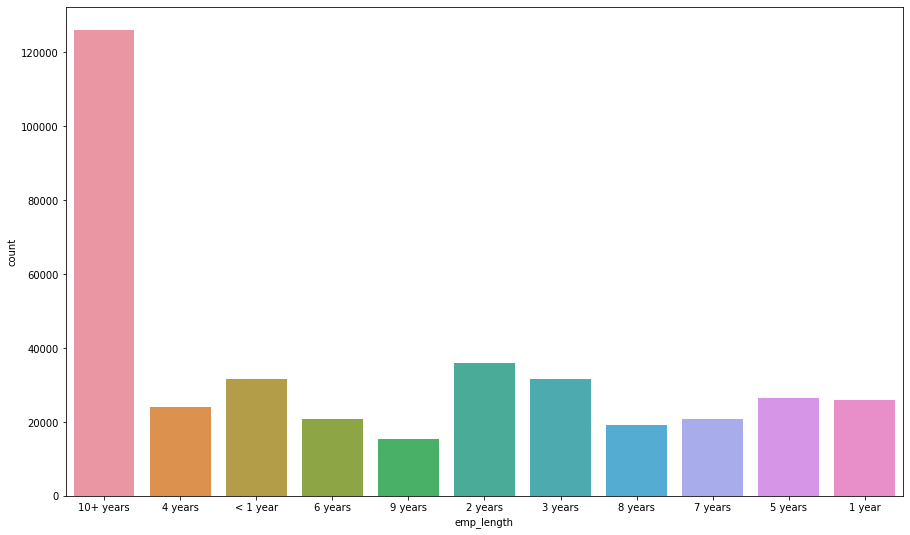

In [668]:
#Invetsigate emp_length
plt.figure(figsize=(15,9))
sns.countplot(x='emp_length', data = df)

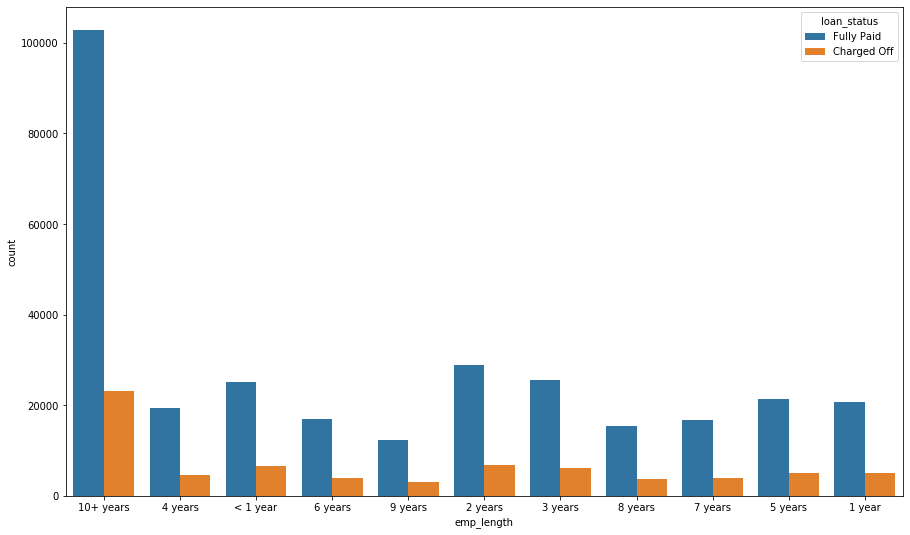

In [669]:
#Invetsigate emp_length with loan status
plt.figure(figsize=(15,9))
sns.countplot(x='emp_length', data = df, hue = 'loan_status')

In [670]:
#This doesn;t indicate a strong relationship between being charged off and employment length

In [671]:
#Want percentage of charge off per category

In [672]:
emp_charged_off = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fully_paid = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [673]:
emp_length = emp_charged_off/emp_fully_paid

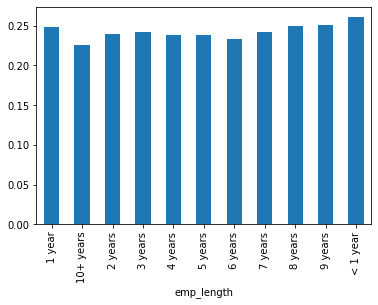

In [674]:
#Hardly any difference, so can remove emp_length from DF
emp_length.plot(kind='bar')

In [675]:
df = df.drop('emp_length', axis = 1)

In [676]:
#Following columns still have missing values
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [677]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [678]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [679]:
#Repeated information -> delete title column
df = df.drop('title', axis = 1)

In [680]:
#Investigate mort_acc  
feat_info('mort_acc')

Number of mortgage accounts.


In [681]:
df['mort_acc'].value_counts()
#Could drop the whole feature, but 10% is missing -> will fill it

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [682]:
#Correlations with 'mort_acc'
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [683]:
#Highest correlation is with total_acc feature - which makes sense

In [684]:
df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [685]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


In [686]:
feat_info('mort_acc')

Number of mortgage accounts.


In [687]:
#Fill in missing values with average of mean of total.acc for same index
acc_av = df.groupby('total_acc').mean()['mort_acc']

In [688]:
def acc_fill(mort_acc,total_acc):
    if np.isnan(mort_acc) == True:
        return acc_av[total_acc]
    else:
        return mort_acc

In [689]:
df['mort_acc'] = df.apply(lambda x: acc_fill(x['total_acc'], x['mort_acc']), axis = 1)

In [690]:
df['mort_acc'].head()

0    25.0
1    27.0
2    26.0
3    13.0
4    43.0
Name: mort_acc, dtype: float64

In [691]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [692]:
#revol_util and pub_rec_bankruptcies have missing data but its less than 0.5% of df

In [693]:
df = df.dropna()

In [694]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [695]:
#All data cleaned!

In [696]:
#####Part 3 - Catergorical and Dummy Variables#####

In [697]:
#Locations with non-numeric items
df.select_dtypes(include=['object'])

,term,grade,sub_grade,home_ownership,verification_status,issue_d,loan_status,purpose,earliest_cr_line,initial_list_status,application_type,address
0,36 months,B,B4,RENT,Not Verified,Jan-2015,Fully Paid,vacation,Jun-1990,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,36 months,B,B5,MORTGAGE,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Jul-2004,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,36 months,B,B3,RENT,Source Verified,Jan-2015,Fully Paid,credit_card,Aug-2007,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,36 months,A,A2,RENT,Not Verified,Nov-2014,Fully Paid,credit_card,Sep-2006,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813"
4,60 months,C,C5,MORTGAGE,Verified,Apr-2013,Charged Off,credit_card,Mar-1999,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...
396025,60 months,B,B4,RENT,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Nov-2004,w,INDIVIDUAL,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,36 months,C,C1,MORTGAGE,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Feb-2006,f,INDIVIDUAL,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,36 months,B,B1,RENT,Verified,Oct-2013,Fully Paid,debt_consolidation,Mar-1997,f,INDIVIDUAL,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,60 months,C,C2,MORTGAGE,Verified,Aug-2012,Fully Paid,debt_consolidation,Nov-1990,f,INDIVIDUAL,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [698]:
#Converting term feature into numeric
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [699]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [700]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

In [701]:
#Grade and sub grade are subsets of each other so will drop 'grade' 

In [702]:
df = df.drop('grade', axis = 1)

In [703]:
#Converting subgrade into dummy variables
d = pd.get_dummies(df['sub_grade'],drop_first=True)

In [704]:
d

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [705]:
df = pd.concat([df, d], axis = 1)

In [706]:
df = df.drop('sub_grade', axis = 1)

In [707]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [708]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [709]:
#Getting dummy vars for 'verification_status', 'application_type','initial_list_status','purpose'


In [710]:
d = pd.get_dummies(df['verification_status'],drop_first=True)

In [711]:
df = pd.concat([df, d], axis = 1)

In [712]:
df = df.drop('verification_status', axis = 1)

In [713]:
d = pd.get_dummies(df['application_type'],drop_first=True)

In [714]:
df = pd.concat([df, d], axis = 1)

In [715]:
df = df.drop('application_type', axis = 1)

In [716]:
d = pd.get_dummies(df['initial_list_status'],drop_first=True)

In [717]:
df = pd.concat([df, d], axis = 1)

In [718]:
df = df.drop('initial_list_status', axis = 1)

In [719]:
d = pd.get_dummies(df['purpose'],drop_first=True)

In [720]:
df = pd.concat([df, d], axis = 1)

In [721]:
df = df.drop('purpose', axis = 1)

In [722]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,0


In [723]:
#Looking at home ownership
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [724]:
#Will replace 'NONE and ANY' with OTHER

In [725]:
df['home_ownership']

0             RENT
1         MORTGAGE
2             RENT
3             RENT
4         MORTGAGE
            ...   
396025        RENT
396026    MORTGAGE
396027        RENT
396028    MORTGAGE
396029        RENT
Name: home_ownership, Length: 395219, dtype: object

In [726]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [727]:
d = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,d],axis=1)

In [728]:
#Extracting 'zip code' from address

In [729]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [730]:
df['zip_code']=df['address'].apply(lambda address: (address)[-5:])

In [731]:
d = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,d],axis=1)

In [732]:
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,6.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,6.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,15.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,9.0,...,0,0,0,0,1,0,0,0,0,0


In [733]:
#Dropping issue_d

In [734]:
df.drop(['issue_d'], axis = 1)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,Jun-1990,16.0,0.0,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,Jul-2004,17.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,Aug-2007,13.0,0.0,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,Sep-2006,6.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,Mar-1999,13.0,0.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,Nov-2004,6.0,0.0,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,Feb-2006,6.0,0.0,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,Mar-1997,15.0,0.0,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,Nov-1990,9.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [735]:
#Dealing with earliest_cr_line

In [736]:
df['earliest_cr_line'][:-4]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396021    Nov-1996
396022    Oct-2004
396023    May-1998
396024    Nov-1991
396025    Nov-2004
Name: earliest_cr_line, Length: 395215, dtype: object

In [737]:
df['earliest_cr_line_year']=df['earliest_cr_line'].apply(lambda y: int(y[4:]))

In [738]:
df = df.drop('earliest_cr_line', axis = 1)

In [739]:
#df.drop(['issue_d'], axis = 1)

In [740]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,open_acc,pub_rec,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_line_year
0,10000.0,36,11.44,329.48,117000.0,Jan-2015,Fully Paid,26.24,16.0,0.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Jan-2015,Fully Paid,22.05,17.0,0.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Jan-2015,Fully Paid,12.79,13.0,0.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Nov-2014,Fully Paid,2.60,6.0,0.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Apr-2013,Charged Off,33.95,13.0,0.0,...,0,1,0,0,0,0,0,0,0,1999


In [741]:
df = df.drop('loan_status',axis=1)

In [742]:
df = df.drop('issue_d',axis=1)

In [743]:
#####Part-4 TRAINING THE MODEL#####

In [571]:
#Selecting only 10% of data - option
#df = df.sample(frac=0.1,random_state=101)
print(len(df))

39522


In [572]:
from sklearn.model_selection import train_test_split

In [573]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [600]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [601]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [602]:
from sklearn.preprocessing import MinMaxScaler

In [603]:
scaler = MinMaxScaler()

In [605]:
X_train = scaler.fit_transform(X_train)

In [606]:
X_test = scaler.transform(X_test)


In [607]:
#Importing sequential model from keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [608]:
model = Sequential()
# input layer
model.add(Dense(100,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(75, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [609]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          batch_size=512,
          validation_data=(X_test, y_test), 
          )

Train on 31617 samples, validate on 7905 samples
Epoch 1/100
31617/31617 [==============================] - 2s 56us/sample - loss: 0.4913 - val_loss: 0.3919
Epoch 2/100
31617/31617 [==============================] - 0s 15us/sample - loss: 0.3568 - val_loss: 0.2859
Epoch 3/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.3038 - val_loss: 0.2700
Epoch 4/100
31617/31617 [==============================] - 1s 17us/sample - loss: 0.2889 - val_loss: 0.2664
Epoch 5/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2817 - val_loss: 0.2616
Epoch 6/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2782 - val_loss: 0.2625
Epoch 7/100
31617/31617 [==============================] - 1s 17us/sample - loss: 0.2735 - val_loss: 0.2606
Epoch 8/100
31617/31617 [==============================] - 1s 17us/sample - loss: 0.2710 - val_loss: 0.2615
Epoch 9/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.269

Epoch 76/100
31617/31617 [==============================] - 1s 17us/sample - loss: 0.2195 - val_loss: 0.2973
Epoch 77/100
31617/31617 [==============================] - 0s 15us/sample - loss: 0.2195 - val_loss: 0.2936
Epoch 78/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2199 - val_loss: 0.2917
Epoch 79/100
31617/31617 [==============================] - 0s 15us/sample - loss: 0.2189 - val_loss: 0.2956
Epoch 80/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2181 - val_loss: 0.2948
Epoch 81/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2170 - val_loss: 0.2983
Epoch 82/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2170 - val_loss: 0.2987
Epoch 83/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2175 - val_loss: 0.2934
Epoch 84/100
31617/31617 [==============================] - 1s 16us/sample - loss: 0.2161 - val_loss: 0.2963
Epoch 85/100
31617/

In [610]:
from tensorflow.keras.models import load_model

In [611]:
model.save('KOD_Loan_Default_Project.h5')  

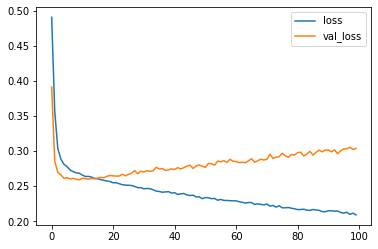

In [612]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [613]:
#####Part-5 Model Evaluation #####

In [614]:
predictions = model.predict_classes(X_test)

In [615]:
from sklearn.metrics import classification_report,confusion_matrix

In [616]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.54      0.64      1564
           1       0.90      0.97      0.93      6341

    accuracy                           0.88      7905
   macro avg       0.85      0.75      0.79      7905
weighted avg       0.88      0.88      0.87      7905

[[ 846  718]
 [ 216 6125]]


In [617]:
#Evaluating for a random customer
import random
random.seed(42)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                  8400.00
term                         36.00
int_rate                      9.67
installment                 269.75
annual_inc               107000.00
                           ...    
48052                         1.00
70466                         0.00
86630                         0.00
93700                         0.00
earliest_cr_line_year      1996.00
Name: 105919, Length: 78, dtype: float64

In [618]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

In [619]:
df.iloc[random_ind]['loan_repaid']

1.0

In [ ]:
#SO yes this random person would have paid their loan back!